In [12]:
import h5py
# from google.colab import drive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import skimage.io as io
import tensorflow
import random
import csv
import matplotlib.patches as patches
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
# drive.mount('/content/gdrive')
from tensorflow.keras.applications.mobilenet import preprocess_input

In [3]:
#  local path settings
# project_path = '/content/gdrive/My Drive/assignments/practice_exercise_computervision/'
DATASET_FOLDER = './images_racoon/'
TRAIN_CSV = './train_labels.csv'


# project_path = '/content/gdrive/My Drive/assignments/practice_exercise_computervision/'
# DATASET_FOLDER = '/content/gdrive/My Drive/assignments/practice_exercise_computervision/images_racoon/'
# TRAIN_CSV = project_path +'train_labels.csv'
# TRAIN_CSV
# os.chdir(project_path)
# print(os.getcwd())

In [4]:
#  printing the shape of the gien dataset
train_tables = pd.read_csv(TRAIN_CSV)
print(train_tables.head())
print('\nShape of data is : ',train_tables.shape)

         filename  width  height    class  xmin  ymin  xmax  ymax
0  raccoon-17.jpg    259     194  raccoon    95    60   167   118
1  raccoon-11.jpg    660     432  raccoon     3     1   461   431
2  raccoon-63.jpg    600     400  raccoon    74   107   280   290
3  raccoon-63.jpg    600     400  raccoon   227    93   403   298
4  raccoon-60.jpg    273     185  raccoon    58    33   197   127

Shape of data is :  (173, 8)


In [5]:
#  Loading the image fromt the shared drive
path = os.path.join('./images_racoon/')
imagesinList = os.listdir('./images_racoon/')
batch_images=[]
for i in range(len(imagesinList)):
  batch_images.append(path+imagesinList[i]) 
# batch_images = path+imagesinList
# dataframeImages = pd.DataFrame(imagesinList)
# dataframeImages.head()
# img = io.imread(path+'raccoon-17.jpg')
# plt.imshow(img)
# printing some images
# for i in range(5):
#   img = io.imread(path+imagesinList[i])
#   plt.imshow(img)
  # plt.show()
# batch_images
x_val = batch_images[0:173]
y_val = batch_images[173:]

In [6]:
# declaring varibel for image size as 128
IMAGE_SIZE = 128
x_train =[] 
y_train = np.zeros((len(train_tables),4))
for index, rows in train_tables.iterrows(): 
    filename = rows[0]
    width = rows[1]
    height = rows[2]
    x0 = rows[4]
    y0 = rows[5]
    x1 = rows[6]
    y1 = rows[7]
    
    y_train[index, 0] = x0 * IMAGE_SIZE / width                 # Normalize bounding box by image size
    y_train[index, 1] = y0 * IMAGE_SIZE / height                # Normalize bounding box by image size
    y_train[index, 2] = (x1 - x0) * IMAGE_SIZE / width          # Normalize bounding box by image size
    y_train[index, 3] = (y1 - y0) * IMAGE_SIZE / height         # Normalize bounding box by image size

    x_train.append(path+filename)

In [7]:
x_train[:5]

['./images_racoon/raccoon-17.jpg',
 './images_racoon/raccoon-11.jpg',
 './images_racoon/raccoon-63.jpg',
 './images_racoon/raccoon-63.jpg',
 './images_racoon/raccoon-60.jpg']

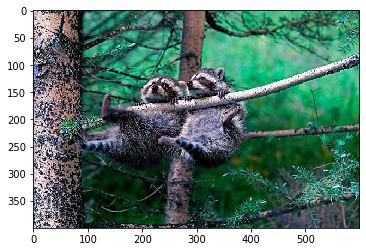

In [8]:
# showing an image from the training set before bounsding box
imagefile = x_train[3]
unscaled1 = cv2.imread(imagefile)
fig,ax1 = plt.subplots()
ax1.imshow(unscaled1)
plt.show()

In [9]:
# Picking an image to check that how it looks
filename = x_train[3]
unscaled = cv2.imread(filename)
region = y_train[3]
image_height, image_width, _ = unscaled.shape
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

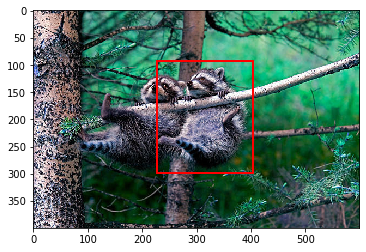

In [10]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [13]:
#  Preprocessing input using mobile net
from PIL import Image


for i, f in enumerate(x_train):
  img = Image.open(f) # Read image
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  x_train[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()

In [14]:
x_train = np.array(x_train)

In [15]:
x_train.shape

(173, 128, 128, 3)

In [16]:
y_train.shape

(173, 4)

In [18]:
IMAGE_SIZE = 128
list1 = [1,2,4,5,6,7]
with open(TRAIN_CSV, "r") as f:
  y_val = np.zeros((sum(1 for line in f), 4))
  X_val = []
  f.seek(0)
  data = csv.reader(f, delimiter=',')
  for index, row in enumerate(data):
    for i, r in enumerate(row):
      # print(r)
      if i in list1:
        print(i)
        row[i] = int(r)
    path, image_width, image_height,class_o, x0, y0, x1, y1 = row     # Read image, its dimensions, BBox coords
    # path = "./" + path.split('/')[-2] + "/" + path.split('/')[-1]
    y_val[index, 0] = int(x0) * IMAGE_SIZE / int(image_width)                 # Normalize bounding box by image size
    # y_val[index, 1] = y0 * IMAGE_SIZE / image_height                # Normalize bounding box by image size
    # y_val[index, 2] = (x1 - x0) * IMAGE_SIZE / image_width          # Normalize bounding box by image size
    # y_val[index, 3] = (y1 - y0) * IMAGE_SIZE / image_height         # Normalize bounding box by image size

    # X_val.append(path)  

1


ValueError: invalid literal for int() with base 10: 'width'

In [110]:
#  loading the racoon images provided
for i, f in enumerate(x_val):
  img = Image.open(f) # Read image
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  batch_images[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()

In [111]:

x_val = np.array(x_val)
x_val.shape
# x_val

(173, 128, 128, 3)

In [112]:
for i, f in enumerate(y_val):
  img = Image.open(f) # Read image
  # img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  y_val[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()

In [116]:
y_val = np.array(y_val)
y_val.shape = (27,1)

In [82]:
# Creating model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=4, name="coords")(x0)
    # In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
    x2 = Reshape((4,))(x1) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=x2)

In [83]:
# Defining evaluation matrix

In [84]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tensorflow.py_function(loss, [y_true, y_pred], tensorflow.float32)
    return iou

In [85]:
# Initializing the model and its sumery

In [86]:
model = create_model(False) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128 

In [87]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE

In [ ]:
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)

# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[callback])